In [109]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [110]:
df=pd.read_csv('titanicdata.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [111]:
df.shape

(891, 12)

In [112]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [114]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

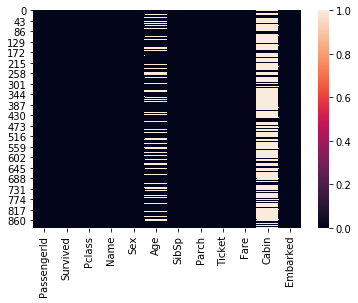

In [115]:
sns.heatmap(df.isnull())

In [116]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [117]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [118]:
repeat='S'
df['Embarked']=df['Embarked'].fillna(repeat)

In [119]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [120]:
df.drop(['PassengerId'],axis=1,inplace=True)

In [121]:
df.drop(['Name'],axis=1,inplace=True)

In [122]:
df.drop(['Ticket'],axis=1,inplace=True)

In [123]:
df.drop(['Cabin'],axis=1,inplace=True)

In [124]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


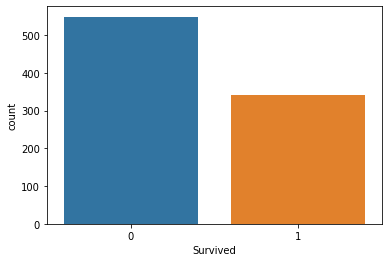

In [125]:
sns.countplot(x='Survived',data=df)



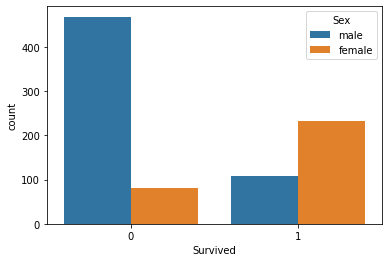

In [126]:
sns.countplot(x='Survived',hue='Sex',data=df)

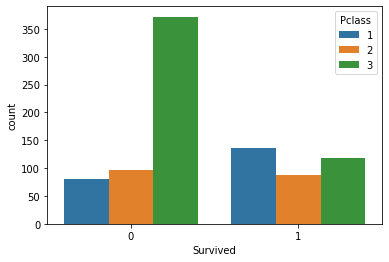

In [127]:
sns.countplot(x='Survived',hue='Pclass',data=df)

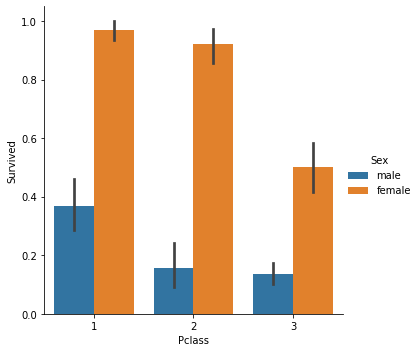

In [128]:
gr=sns.catplot(x='Pclass',y='Survived',hue='Sex',data=df,kind='bar')
plt.show()

In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
le=LabelEncoder()

In [131]:
df['Sex']=le.fit_transform(df['Sex'])

In [132]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [133]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [134]:
from scipy.stats import zscore

In [135]:
z_score=abs(zscore(df))
print(df.shape)
dffinal=df.loc[(z_score<3).all(axis=1)]
print(dffinal.shape)

(891, 8)
(820, 8)


In [136]:
dffinal

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [137]:
dffinal.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.401952
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.277386
dtype: float64

In [138]:
for col in dffinal.columns:
    if dffinal.skew().loc[col]>0.55:
        dffinal[col]=np.log1p(dffinal[col])

C:\Users\Siddhant\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [139]:
dffinal.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.401952
SibSp       1.292829
Parch       1.832391
Fare        0.196364
Embarked   -1.277386
dtype: float64

In [140]:
dffinal

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,0.693147,0.000000,2.110213,2
1,1,1,0,38.0,0.693147,0.000000,4.280593,0
2,1,3,0,26.0,0.000000,0.000000,2.188856,2
3,1,1,0,35.0,0.693147,0.000000,3.990834,2
4,0,3,1,35.0,0.000000,0.000000,2.202765,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0.000000,0.000000,2.639057,2
887,1,1,0,19.0,0.000000,0.000000,3.433987,2
888,0,3,0,28.0,0.693147,1.098612,3.196630,2
889,1,1,1,26.0,0.000000,0.000000,3.433987,0


In [141]:
y=dffinal.iloc[:,0]
x=dffinal.iloc[:,1:]

In [142]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

In [143]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,0.693147,0.000000,2.110213,2
1,1,0,38.0,0.693147,0.000000,4.280593,0
2,3,0,26.0,0.000000,0.000000,2.188856,2
3,1,0,35.0,0.693147,0.000000,3.990834,2
4,3,1,35.0,0.000000,0.000000,2.202765,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0.000000,0.000000,2.639057,2
887,1,0,19.0,0.000000,0.000000,3.433987,2
888,3,0,28.0,0.693147,1.098612,3.196630,2
889,1,1,26.0,0.000000,0.000000,3.433987,0


In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
scale=StandardScaler()

In [146]:
x=scale.fit_transform(x)
x


array([[ 0.8339949 ,  0.72203588, -0.61192649, ..., -0.46946872,
        -0.83943515,  0.58316179],
       [-1.58680446, -1.38497273,  0.70321021, ..., -0.46946872,
         1.58419878, -1.95366932],
       [ 0.8339949 , -1.38497273, -0.28314231, ..., -0.46946872,
        -0.75161543,  0.58316179],
       ...,
       [ 0.8339949 , -1.38497273, -0.11875023, ...,  2.79333463,
         0.37375205,  0.58316179],
       [-1.58680446,  0.72203588, -0.28314231, ..., -0.46946872,
         0.63880539, -1.95366932],
       [ 0.8339949 ,  0.72203588,  0.21003395, ..., -0.46946872,
        -0.77372876, -0.68525377]])

In [147]:
dx=pd.DataFrame(x)
dx

,0,1,2,3,4,5,6
0,0.833995,0.722036,-0.611926,1.289936,-0.469469,-0.839435,0.583162
1,-1.586804,-1.384973,0.703210,1.289936,-0.469469,1.584199,-1.953669
2,0.833995,-1.384973,-0.283142,-0.607791,-0.469469,-0.751615,0.583162
3,-1.586804,-1.384973,0.456622,1.289936,-0.469469,1.260629,0.583162
4,0.833995,0.722036,0.456622,-0.607791,-0.469469,-0.736084,0.583162
...,...,...,...,...,...,...,...
815,-0.376405,0.722036,-0.200946,-0.607791,-0.469469,-0.248882,0.583162
816,-1.586804,-1.384973,-0.858515,-0.607791,-0.469469,0.638805,0.583162
817,0.833995,-1.384973,-0.118750,1.289936,2.793335,0.373752,0.583162
818,-1.586804,0.722036,-0.283142,-0.607791,-0.469469,0.638805,-1.953669


In [148]:
dx.skew()

0   -0.632242
1   -0.664152
2    0.401952
3    1.292829
4    1.832391
5    0.196364
6   -1.277386
dtype: float64

In [149]:
for col in dx.columns:
    if dx.skew().loc[col]>0.55:
        dx[col]=np.log1p(dx[col])

In [150]:
dx.skew()

0   -0.632242
1   -0.664152
2    0.401952
3    0.993115
4    1.635175
5    0.196364
6   -1.277386
dtype: float64

In [151]:
xtrain,xtest,ytrain,ytest=train_test_split(dx,y,test_size=.22,random_state=45)

In [152]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier()]

In [153]:
for m in model:
    m.fit(xtrain,ytrain)
    m.score(xtrain,ytrain)
    predm=m.predict(xtest)
    print('accuracy score of ',m,'is',accuracy_score(ytest,predm))
    print(confusion_matrix(ytest,predm))
    print(classification_report(ytest,predm))
    print('\n')

accuracy score of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is 0.7845303867403315
[[87 16]
 [23 55]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       103
           1       0.77      0.71      0.74        78

    accuracy                           0.78       181
   macro avg       0.78      0.77      0.78       181
weighted avg       0.78      0.78      0.78       181



accuracy score of  GaussianNB(priors=None, var_smoothing=1e-09) is 0.7679558011049724
[[83 20]
 [22 56]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       103
           1       0.74      0.72      0.73        78

    accuracy    

In [154]:
from sklearn.model_selection import cross_val_score

In [155]:
lr=LogisticRegression()
lrscores=cross_val_score(lr,dx,y,cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())

[0.80487805 0.7804878  0.75609756 0.79268293 0.80487805]
0.7878048780487805 0.018251987252555828


In [156]:
gnb=GaussianNB()
gnbscores=cross_val_score(gnb,dx,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.67682927 0.7804878  0.76219512 0.80487805 0.81097561]
0.7670731707317073 0.04838252298750579


In [157]:
svc=SVC()
svcscores=cross_val_score(svc,dx,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.81097561 0.80487805 0.80487805 0.79878049 0.85365854]
0.8146341463414635 0.019889641988170816


In [158]:
dtc=DecisionTreeClassifier()
dtcscores=cross_val_score(dtc,dx,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.70121951 0.78658537 0.81707317 0.7195122  0.79268293]
0.7634146341463415 0.04487407193408318


In [159]:
svc=SVC(probability=True)
svc.fit(xtrain,ytrain)
predsvc=svc.predict(xtest)
y_pred_prob=svc.predict_proba(xtest)[:,1]
print(y_pred_prob)

[0.55462858 0.87779873 0.141927   0.14295362 0.28571475 0.1056108
 0.24375367 0.77042616 0.9128578  0.14331635 0.90050238 0.1431416
 0.14345294 0.1425424  0.14284568 0.37534528 0.14924345 0.13956596
 0.13981989 0.14283678 0.14282654 0.13278252 0.13390146 0.14015167
 0.40899395 0.14250246 0.9340509  0.13979147 0.89391948 0.12390019
 0.13862917 0.14335862 0.15033567 0.1083398  0.89442288 0.12722845
 0.21451998 0.13766435 0.13981989 0.14321193 0.87736272 0.15673858
 0.91520588 0.14022845 0.14249425 0.14102937 0.1423708  0.14235207
 0.20287064 0.87377848 0.16392318 0.14321522 0.87908646 0.85715084
 0.2889053  0.22792242 0.7134552  0.13841053 0.8604204  0.87723325
 0.1411076  0.36077976 0.14295505 0.13979813 0.79604458 0.14018089
 0.91368881 0.86353602 0.78999898 0.13947556 0.14321193 0.14106116
 0.93433435 0.1402095  0.83605616 0.27957149 0.86038058 0.13474128
 0.15088151 0.81200162 0.79025738 0.24628426 0.12440902 0.14185935
 0.85613125 0.93791161 0.13284121 0.21895696 0.14002091 0.184267

In [160]:
from sklearn.externals import joblib
joblib.dump(svc,'svcfile.obj')
svc_from_joblib=joblib.load('svcfile.obj')
svc_from_joblib.predict(xtest)

C:\Users\Siddhant\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0], dtype=int64)